mkdir: cannot create directory ‘csv_files’: File exists
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Rows in trades: 79225
Rows in sentiment: 2644
Rows after merge: 35864

Average Closed PnL by Market Sentiment:
classification
Extreme Fear       1.891632
Neutral           27.088803
Greed             53.988003
Fear             128.287950
Extreme Greed    205.816345
Name: Closed PnL, dtype: float64 

Correlation matrix:
            Closed PnL  value
Closed PnL       1.000  0.011
value            0.011  1.000 



<Figure size 1000x600 with 0 Axes>

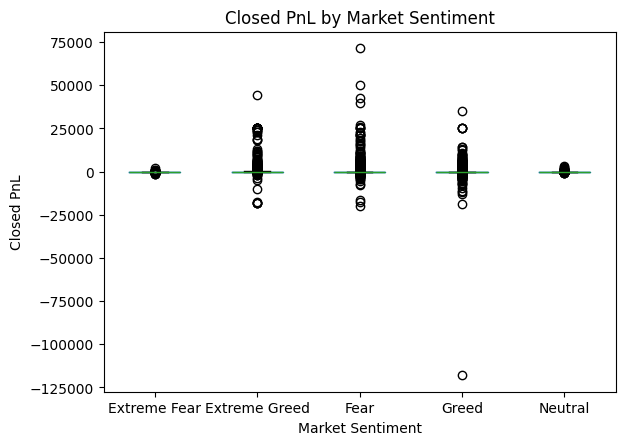

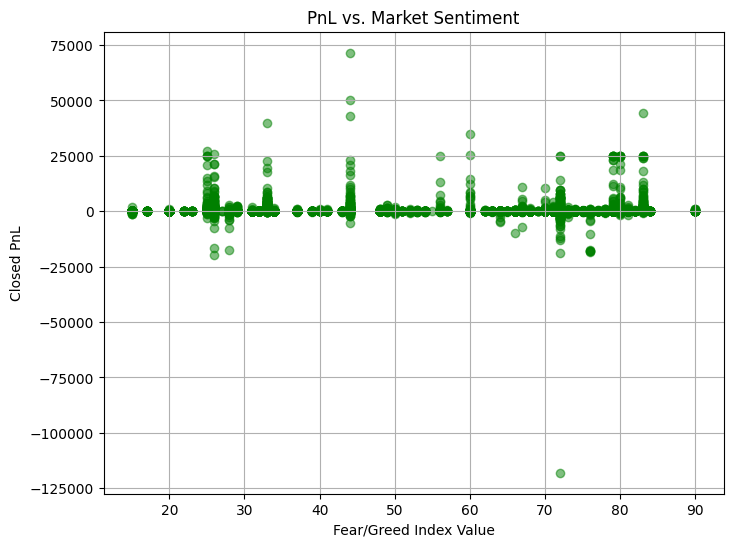

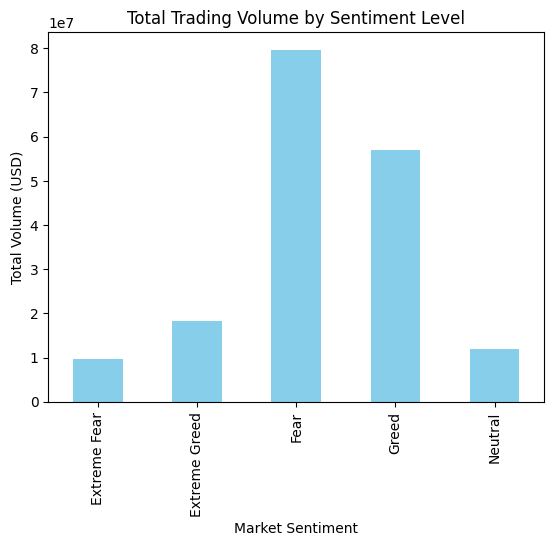

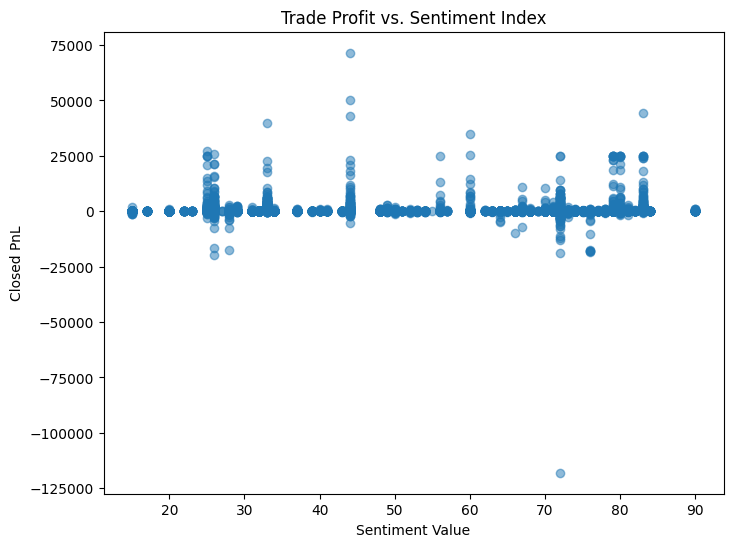

In [14]:
# To create a folder named 'csv_files'
!mkdir csv_files
!mkdir -p outputs

# To create any other folder, just change the name
# !mkdir outputs
from google.colab import drive
drive.mount('/content/drive')

import os
folder_path = '/content/drive/MyDrive/my_colab_folder'
os.makedirs(folder_path, exist_ok=True)
# --- IMPORT LIBRARIES ---
import pandas as pd
import matplotlib.pyplot as plt

# --- LOAD DATA ---
trades = pd.read_csv('historical_data.csv')
sentiment = pd.read_csv('fear_greed_index.csv')

# --- DATA CLEANING & PREP ---
# Convert date columns to datetime
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# Ensure numerics
trades['Closed PnL'] = pd.to_numeric(trades['Closed PnL'], errors='coerce')
trades['Size USD'] = pd.to_numeric(trades['Size USD'], errors='coerce')
sentiment['value'] = pd.to_numeric(sentiment['value'], errors='coerce')

# Create 'date' columns for merging
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

# Drop missing dates just in case
trades = trades.dropna(subset=['date'])
sentiment = sentiment.dropna(subset=['date'])

# --- MERGE DATASETS ---
merged = pd.merge(trades, sentiment, on='date', suffixes=('_trade', '_sentiment')).reset_index(drop=True)

# --- BASIC ANALYSIS ---
print(f"Rows in trades: {len(trades)}")
print(f"Rows in sentiment: {len(sentiment)}")
print(f"Rows after merge: {len(merged)}\n")

# Average PnL by market sentiment
avg_pnl = merged.groupby('classification')['Closed PnL'].mean().sort_values()
print("Average Closed PnL by Market Sentiment:")
print(avg_pnl, "\n")

# Correlation between Closed PnL and Sentiment Value
corr = merged[['Closed PnL', 'value']].corr()
print("Correlation matrix:")
print(corr, "\n")

# --- PLOTS ---

## 1. Boxplot: Closed PnL by Market Sentiment
plt.figure(figsize=(10,6))
merged.boxplot(column='Closed PnL', by='classification', grid=False)
plt.title('Closed PnL by Market Sentiment')
plt.suptitle('')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.savefig('outputs/filename.png')
plt.show()

## 2. Scatter Plot: Profit vs. Sentiment Value
plt.figure(figsize=(8,6))
plt.scatter(merged['value'], merged['Closed PnL'], alpha=0.5, c='green')
plt.xlabel('Fear/Greed Index Value')
plt.ylabel('Closed PnL')
plt.title('PnL vs. Market Sentiment')
plt.grid(True)
plt.savefig('outputs/filename.png')
plt.show()

## 3. Bar Chart: Total Trading Volume by Sentiment Level
merged.groupby('classification')['Size USD'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Trading Volume by Sentiment Level')
plt.xlabel('Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.savefig('outputs/filename.png')
plt.show()

## 4. Second Scatter Plot (optional, for visual variety/consistency)
plt.figure(figsize=(8,6))
plt.scatter(merged['value'], merged['Closed PnL'], alpha=0.5)
plt.title('Trade Profit vs. Sentiment Index')
plt.xlabel('Sentiment Value')
plt.ylabel('Closed PnL')
plt.savefig('outputs/filename.png')
plt.show()




